# Problem 1: Line plots

Assignment and target figure from [Earth and Environmental Data Science](https://earth-env-data-science.github.io/assignments/more_matplotlib.html).

Target figure size is 856 x 856 pixels.

**Target Figure:**

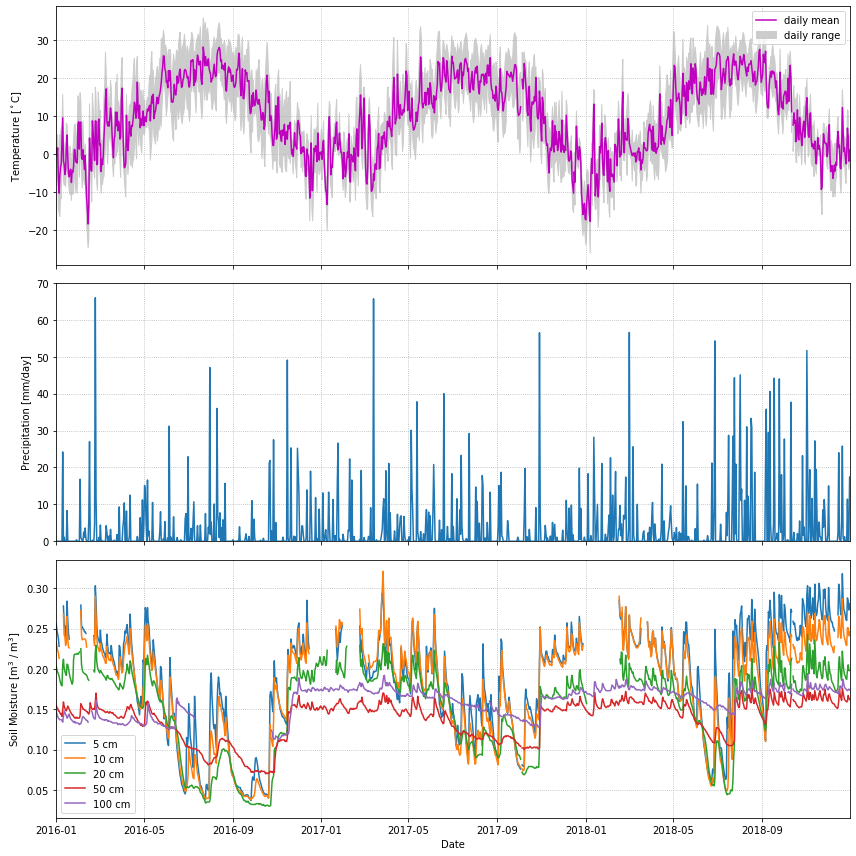


## Code provided by tutorial

In [1]:
import pooch
import pandas as pd

In [2]:
POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    # Use the figshare DOI
    base_url="doi:10.5281/zenodo.5553029/",
    registry={
        "HEADERS.txt": "md5:2a306ca225fe3ccb72a98953ded2f536",
        "CRND0103-2016-NY_Millbrook_3_W.txt": "md5:eb69811d14d0573ffa69f70dd9c768d9",
        "CRND0103-2017-NY_Millbrook_3_W.txt": "md5:b911da727ba1bdf26a34a775f25d1088",
        "CRND0103-2018-NY_Millbrook_3_W.txt": "md5:5b61bc687261596eba83801d7080dc56",
        "CRND0103-2019-NY_Millbrook_3_W.txt": "md5:9b814430612cd8a770b72020ca4f2b7d",
        "CRND0103-2020-NY_Millbrook_3_W.txt": "md5:cd8de6d5445024ce35fcaafa9b0e7b64"
    },
)


with open(POOCH.fetch("HEADERS.txt")) as fp:
    data = fp.read()
lines = data.split('\n')
headers = lines[1].split(' ')

dframes = []
for year in range(2016, 2019):
    fname = f'CRND0103-{year}-NY_Millbrook_3_W.txt'               
    df = pd.read_csv(POOCH.fetch(fname), parse_dates=[1],
                     names=headers, header=None, sep='\s+',
                     na_values=[-9999.0, -99.0])
    dframes.append(df)

df = pd.concat(dframes)
df = df.set_index('LST_DATE')
df

#########################################################
#### BELOW ARE THE VARIABLES YOU SHOULD USE IN THE PLOTS!
#### (numpy arrays)  
#### NO PANDAS ALLOWED!
#########################################################

t_daily_min = df.T_DAILY_MIN.values
t_daily_max = df.T_DAILY_MAX.values
t_daily_mean = df.T_DAILY_MEAN.values
p_daily_calc = df.P_DAILY_CALC.values
soil_moisture_5 = df.SOIL_MOISTURE_5_DAILY.values
soil_moisture_10 = df.SOIL_MOISTURE_10_DAILY.values
soil_moisture_20 = df.SOIL_MOISTURE_20_DAILY.values
soil_moisture_50 = df.SOIL_MOISTURE_50_DAILY.values
soil_moisture_100 = df.SOIL_MOISTURE_100_DAILY.values
date = df.index.values

units = lines[2].split(' ')
for name, unit in zip(headers, units):
    print(f'{name}: {unit}')

WBANNO: XXXXX
LST_DATE: YYYYMMDD
CRX_VN: XXXXXX
LONGITUDE: Decimal_degrees
LATITUDE: Decimal_degrees
T_DAILY_MAX: Celsius
T_DAILY_MIN: Celsius
T_DAILY_MEAN: Celsius
T_DAILY_AVG: Celsius
P_DAILY_CALC: mm
SOLARAD_DAILY: MJ/m^2
SUR_TEMP_DAILY_TYPE: X
SUR_TEMP_DAILY_MAX: Celsius
SUR_TEMP_DAILY_MIN: Celsius
SUR_TEMP_DAILY_AVG: Celsius
RH_DAILY_MAX: %
RH_DAILY_MIN: %
RH_DAILY_AVG: %
SOIL_MOISTURE_5_DAILY: m^3/m^3
SOIL_MOISTURE_10_DAILY: m^3/m^3
SOIL_MOISTURE_20_DAILY: m^3/m^3
SOIL_MOISTURE_50_DAILY: m^3/m^3
SOIL_MOISTURE_100_DAILY: m^3/m^3
SOIL_TEMP_5_DAILY: Celsius
SOIL_TEMP_10_DAILY: Celsius
SOIL_TEMP_20_DAILY: Celsius
SOIL_TEMP_50_DAILY: Celsius
SOIL_TEMP_100_DAILY: Celsius
: 


## Code written by myself

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
monitor_dpi = 93                       # DPI of monitor I am using
target_size = (856, 856)               # Size of target figure in pixels
figsize = (856 / 93, 856 / 93)         # Set figsize in inches which will produce a figure of the same size in pixels as the target figure
figsize

(9.204301075268818, 9.204301075268818)

In [5]:
temp_lims = [-30, 40]
temp_ticks = np.arange(-20, 40, 10)

precip_lims = [0, 70]
precip_ticks = np.arange(0, 80, 10)

soil_lims = [0, 0.35]
soil_ticks = np.arange(0.05, 0.35, 0.05)

date_lims = [min(date), max(date)]

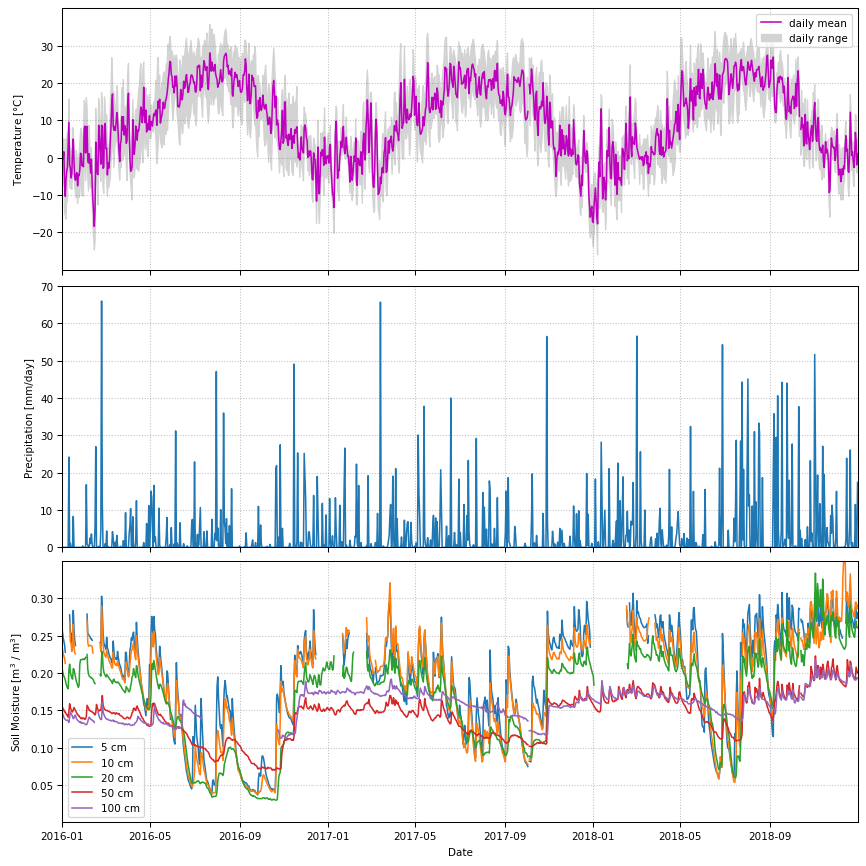

In [13]:
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'lines.linewidth': 1.2})

fig, ax = plt.subplots(figsize = figsize, dpi = monitor_dpi, nrows = 3, 
                       facecolor = 'w', layout = 'constrained')

line1 = ax[0].plot(date, t_daily_mean, color = 'm', label = 'daily mean')
ax[0].fill_between(date, t_daily_min, t_daily_max, facecolor = 'lightgrey', edgecolor = 'lightgrey', label = 'daily range')
ax[0].set_ylim(temp_lims)
ax[0].set_yticks(temp_ticks)
ax[0].set_xlim(date_lims)
ax[0].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[0].set_ylabel('Temperature [$\degree$C]')
ax[0].legend(loc = 1)
ax[0].set_xticklabels([])

line2 = ax[1].plot(date, p_daily_calc, color = 'tab:blue')
ax[1].set_ylim(precip_lims)
ax[1].set_yticks(precip_ticks)
ax[1].set_xlim(date_lims)
ax[1].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[1].set_ylabel('Precipitation [mm/day]')
ax[1].set_xticklabels([])

line3 = ax[2].plot(date, soil_moisture_5, color = 'tab:blue', label = '5 cm')
line4 = ax[2].plot(date, soil_moisture_10, color = 'tab:orange', label = '10 cm')
line5 = ax[2].plot(date, soil_moisture_20, color = 'tab:green', label = '20 cm')
line6 = ax[2].plot(date, soil_moisture_50, color = 'tab:red', label = '50 cm')
line7 = ax[2].plot(date, soil_moisture_100, color = 'tab:purple', label = '100 cm')
ax[2].set_ylim(soil_lims)
ax[2].set_yticks(soil_ticks)
ax[2].set_xlim(date_lims)
ax[2].grid(which = 'major', linestyle = 'dotted', color = 'grey', alpha = 0.5)
ax[2].set_ylabel('Soil Moisture [m$^3$ / m$^3$]')
ax[2].legend(loc = 3)
ax[2].set_xlabel('Date')

plt.savefig('Line Assignment.png')